<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practised them yet). In this project we'll review _train/test split_ validation that is a fundamental method for avoiding overfitting. 

The idea is similar to 'cross-validation' — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

We will cover Linear Regression and Knn in this project, with an Enrichment section at the end:
<a id="home"></a>
1. [Linear Regression - Ames housing data](#lin-reg)
2. [Optional: Knn - iris data set](#knn)
3. [Optional: Enrichment](#enrichment)

#### [Home](#home)

<a id="lin-reg"></a>
# <font style='color: green'>1) Linear Regression Use Case</font>

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Ames housing data by picking three different subsets of variables. (You could also fit one or more polynomial models, or any other model you'd like, but we haven't covered them.) 

### Here's What We Will Be Doing:

* Working with Ames housing data to predict the value of a home.
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

In this given task, you will be asked to model the median home price of various houses in Iowa (the Ames housing data set we have come across before). This is a probable use case: we are predicting a continuous, numeric output (price) based on a combination of discrete features.

Reminder of the dataset: [Ames house price data on Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### Data dictionary (taken from Kaggle)

+ SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
+ MSSubClass: The building class
+ MSZoning: The general zoning classification
+ LotFrontage: Linear feet of street connected to property
+ LotArea: Lot size in square feet
+ Street: Type of road access
+ Alley: Type of alley access
+ LotShape: General shape of property
+ LandContour: Flatness of the property
+ Utilities: Type of utilities available
+ LotConfig: Lot configuration
+ LandSlope: Slope of property
+ Neighborhood: Physical locations within Ames city limits
+ Condition1: Proximity to main road or railroad
+ Condition2: Proximity to main road or railroad (if a second is present)
+ BldgType: Type of dwelling
+ HouseStyle: Style of dwelling
+ OverallQual: Overall material and finish quality
+ OverallCond: Overall condition rating
+ YearBuilt: Original construction date
+ YearRemodAdd: Remodel date
+ RoofStyle: Type of roof
+ RoofMatl: Roof material
+ Exterior1st: Exterior covering on house
+ Exterior2nd: Exterior covering on house (if more than one material)
+ MasVnrType: Masonry veneer type
+ MasVnrArea: Masonry veneer area in square feet
+ ExterQual: Exterior material quality
+ ExterCond: Present condition of the material on the exterior
+ Foundation: Type of foundation
+ BsmtQual: Height of the basement
+ BsmtCond: General condition of the basement
+ BsmtExposure: Walkout or garden level basement walls
+ BsmtFinType1: Quality of basement finished area
+ BsmtFinSF1: Type 1 finished square feet
+ BsmtFinType2: Quality of second finished area (if present)
+ BsmtFinSF2: Type 2 finished square feet
+ BsmtUnfSF: Unfinished square feet of basement area
+ TotalBsmtSF: Total square feet of basement area
+ Heating: Type of heating
+ HeatingQC: Heating quality and condition
+ CentralAir: Central air conditioning
+ Electrical: Electrical system
+ 1stFlrSF: First Floor square feet
+ 2ndFlrSF: Second floor square feet
+ LowQualFinSF: Low quality finished square feet (all floors)
+ GrLivArea: Above grade (ground) living area square feet
+ BsmtFullBath: Basement full bathrooms
+ BsmtHalfBath: Basement half bathrooms
+ FullBath: Full bathrooms above grade
+ HalfBath: Half baths above grade
+ Bedroom: Number of bedrooms above basement level
+ Kitchen: Number of kitchens
+ KitchenQual: Kitchen quality
+ TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
+ Functional: Home functionality rating
+ Fireplaces: Number of fireplaces
+ FireplaceQu: Fireplace quality
+ GarageType: Garage location
+ GarageYrBlt: Year garage was built
+ GarageFinish: Interior finish of the garage
+ GarageCars: Size of garage in car capacity
+ GarageArea: Size of garage in square feet
+ GarageQual: Garage quality
+ GarageCond: Garage condition
+ PavedDrive: Paved driveway
+ WoodDeckSF: Wood deck area in square feet
+ OpenPorchSF: Open porch area in square feet
+ EnclosedPorch: Enclosed porch area in square feet
+ 3SsnPorch: Three season porch area in square feet
+ ScreenPorch: Screen porch area in square feet
+ PoolArea: Pool area in square feet
+ PoolQC: Pool quality
+ Fence: Fence quality
+ MiscFeature: Miscellaneous feature not covered in other categories
+ MiscVal: $Value of miscellaneous feature
+ MoSold: Month Sold
+ YrSold: Year Sold
+ SaleType: Type of sale
+ SaleCondition: Condition of sale

In [4]:
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
# Import the libraries and data we'll need, and set up our feature matrix (Xs) and response vector (y)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

houses = pd.read_csv('data/iowa_houses.csv')

# create feature matrix (X)
feature_cols = houses.columns.drop(['SalePrice'])
X = houses[feature_cols]

# create response vector (y)
y = houses.SalePrice


### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [6]:
# Exploratory data analysis.
houses.head()

,Neighborhood,LotArea,MSZoning,HouseStyle,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,CollgCr,8450,RL,2Story,65.0,7,5,2003,2003,856,...,1,8,0,2003.0,2,548,0,61,0,208500
1,Veenker,9600,RL,1Story,80.0,6,8,1976,1976,1262,...,1,6,1,1976.0,2,460,298,0,0,181500
2,CollgCr,11250,RL,2Story,68.0,7,5,2001,2002,920,...,1,6,1,2001.0,2,608,0,42,0,223500
3,Crawfor,9550,RL,2Story,60.0,7,5,1915,1970,756,...,1,7,1,1998.0,3,642,0,35,272,140000
4,NoRidge,14260,RL,2Story,84.0,8,5,2000,2000,1145,...,1,9,1,2000.0,3,836,192,84,0,250000


In [7]:
# Include: total nulls:index, data types, shape, summary statistics, and the number of unique values for each column

In [8]:
#Total nulls:
houses.isnull().sum()

Neighborhood       0
LotArea            0
MSZoning           0
HouseStyle         0
LotFrontage      259
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
SalePrice          0
dtype: int64

In [9]:
houses.LotFrontage.index

RangeIndex(start=0, stop=1460, step=1)

In [10]:
# Index, data types:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhood   1460 non-null   object 
 1   LotArea        1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   HouseStyle     1460 non-null   object 
 4   LotFrontage    1201 non-null   float64
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

In [11]:
# Shape:
houses.shape

(1460, 27)

In [12]:
# Summary Statistics:
houses.describe()

,LotArea,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,6.099315,5.575342,1971.267808,1984.865753,1057.429452,1162.626712,346.992466,5.844521,...,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,180921.195890
std,9981.264932,24.284752,1.382997,1.112799,30.202904,20.645407,438.705324,386.587738,436.528436,48.623081,...,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,79442.502883
min,1300.000000,21.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,59.000000,5.000000,5.000000,1954.000000,1967.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,129975.000000
50%,9478.500000,69.000000,6.000000,5.000000,1973.000000,1994.000000,991.500000,1087.000000,0.000000,0.000000,...,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,163000.000000
75%,11601.500000,80.000000,7.000000,6.000000,2000.000000,2004.000000,1298.250000,1391.250000,728.000000,0.000000,...,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,214000.000000
max,215245.000000,313.000000,10.000000,9.000000,2010.000000,2010.000000,6110.000000,4692.000000,2065.000000,572.000000,...,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,755000.000000


In [13]:
# The number of unique values for each column:
houses.value_counts()

Neighborhood  LotArea  MSZoning  HouseStyle  LotFrontage  OverallQual  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice
Blmngtn       3010     RL        1Story      43.0         7            5            2005       2006          1248         1248      0         0             1248       2         0         2             1             5             0           2005.0       2           438         108         0            0              167240       1
NridgHt       12182    RL        1Story      95.0         7            5            2005       2005          1541         1541      0         0             1541       2         0         3             1             7             1           2005.0       2           532         0           70           0              220000       1
      

In [14]:
# Remember to handle null cells and columns with non-numeric data in them. Document the decisions you have made and

In [15]:
houses[houses.isnull().any(axis=1)]

,Neighborhood,LotArea,MSZoning,HouseStyle,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
7,NWAmes,10382,RL,2Story,NaN,7,6,1973,1973,1107,...,1,7,2,1973.0,2,484,235,204,228,200000
12,Sawyer,12968,RL,1Story,NaN,5,6,1962,1962,912,...,1,4,0,1962.0,1,352,140,0,0,144000
14,NAmes,10920,RL,1Story,NaN,6,5,1960,1960,1253,...,1,5,1,1960.0,1,352,0,213,176,157000
16,NAmes,11241,RL,1Story,NaN,6,7,1970,1970,1004,...,1,5,1,1970.0,2,480,0,0,0,149000
24,Sawyer,8246,RL,1Story,NaN,5,8,1968,2001,1060,...,1,6,1,1968.0,1,270,406,90,0,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,BrkSide,8854,RL,1.5Unf,NaN,6,6,1916,1950,952,...,1,4,1,1916.0,1,192,0,98,0,121000
1446,Mitchel,26142,RL,1Story,NaN,5,7,1962,1962,1188,...,1,6,0,1962.0,1,312,261,39,0,157900
1449,MeadowV,1533,RM,SFoyer,21.0,5,7,1970,1970,630,...,1,3,0,NaN,0,0,0,0,0,92000
1450,NAmes,9000,RL,2Story,60.0,5,5,1974,1974,896,...,2,8,0,NaN,0,0,32,45,0,136000


In [16]:
houses.drop('LotFrontage', axis=1, inplace=True)
houses.dropna(inplace=True)

In [17]:
houses.isnull().sum()

Neighborhood     0
LotArea          0
MSZoning         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
SalePrice        0
dtype: int64

In [18]:
# Why you have made them.

In [19]:
# Dropped the LotFrontage feature as there were almost 300 missing values (over 15% of the total data set).
# Dropped all rows that have a null value for GarageYrBlt as there was fewer of them (only 81).

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (e.g. GarageQual, GrLivArea, etc...) that you will use to predict our target variable, SalePrice.
Score and plot your predictions. What do these results tell us?

In [20]:
# Using: OverallQual, LotArea & GrLivArea

In [21]:
# Score:

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

feature_cols = ['OverallQual','LotArea','GrLivArea']

X = houses[feature_cols]
y = houses.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Train Model Accuracy:', lr.score(X_train, y_train))
print('Test Model Accuracy:', lr.score(X_test, y_test))

y Intercept: -106984.99707426148
Coefficient [3.47311818e+04 9.08005153e-01 4.41537308e+01]
Mean Absolute Error: 27439.356986298444
Mean Squared Error: 1722222613.5807383
Root Mean Squared Error: 41499.67004182971
Train Model Accuracy: 0.7197740845822541
Test Model Accuracy: 0.7260704828888855


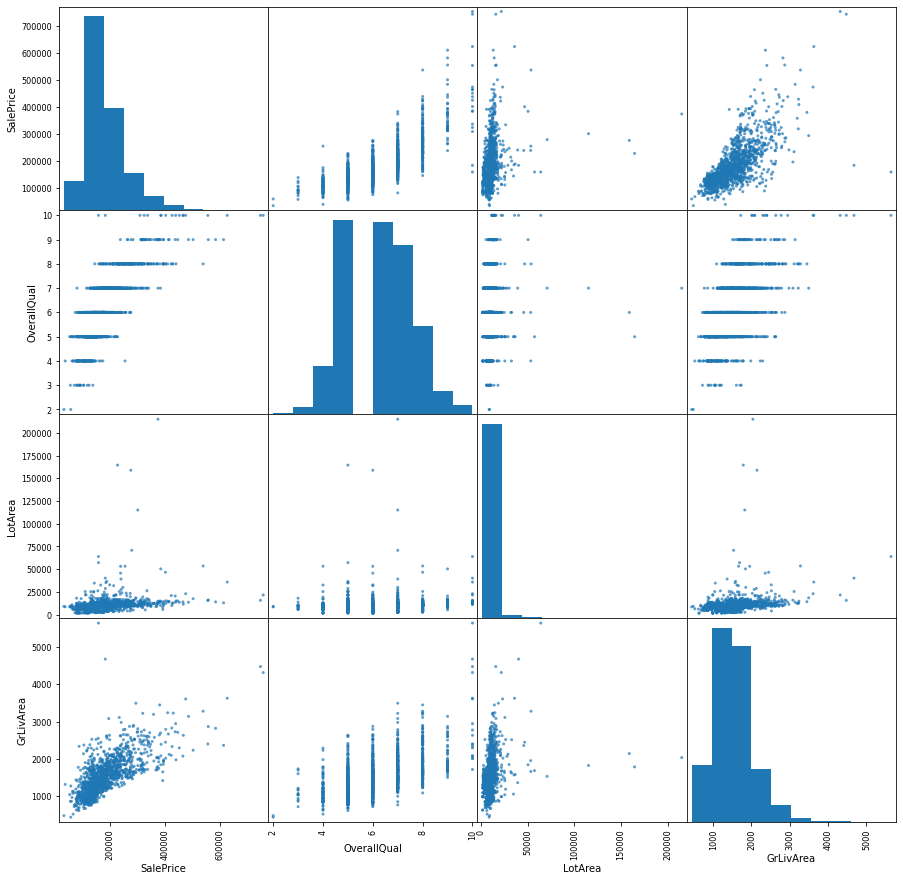

In [22]:
# Plot

pd.plotting.scatter_matrix(houses[['SalePrice'] + feature_cols], figsize=(15, 15), alpha=0.7);

In [23]:
# The higher the overall quality, lot area and gr living area, the higher the sale price (there is some correlation here)

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [24]:
# 70/30 Score:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', lr.score(X_train, y_train), lr.score(X_test, y_test))
print('Train Model Accuracy:', lr.score(X_train, y_train))
print('Test Model Accuracy:', lr.score(X_test, y_test))

y Intercept: -107476.66234428913
Coefficient [3.46826235e+04 8.69059846e-01 4.46176107e+01]
Mean Absolute Error: 26869.333653116595
Mean Squared Error: 1610570883.2112253
Root Mean Squared Error: 40131.91850897768
R Squared: 0.7170640936655499 0.7318701050635277
Train Model Accuracy: 0.7170640936655499
Test Model Accuracy: 0.7318701050635277


In [33]:
# 70/30 Plot:

sns.lmplot(x = X_test, y = y_pred, data=houses);

ValueError: could not broadcast input array from shape (1242,3) into shape (1242,)

In [28]:
# 90/10 Score:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state=123)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Train Model Accuracy:', lr.score(X_train, y_train))
print('Test Model Accuracy:', lr.score(X_test, y_test))

y Intercept: -79451.7003189376
Coefficient [3.36494477e+04 1.44547330e+00 2.27285324e+01]
Mean Absolute Error: 28629.373715817677
Mean Squared Error: 2026721490.0365465
Root Mean Squared Error: 45019.123603603686
Train Model Accuracy: 0.6634324469954671
Test Model Accuracy: 0.6828786132641205


In [30]:
# 90/10 Plot:

sns.lmplot(x = X_test, y = y_pred, data=houses);

/Users/zamena.jaffer/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: could not broadcast input array from shape (1242,3) into shape (1242,)

In [ ]:
# Using a 

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [66]:
from sklearn.model_selection import cross_val_score

In [208]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

41997.73984728017
0.7147205159914714


In [209]:
kf = model_selection.KFold(n_splits=8, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

41641.57555698404
0.7213221415162957


In [210]:
kf = model_selection.KFold(n_splits=10, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

40751.54065418711
0.6954883999977041


In [211]:
# 10 folds seems to be the most optimal as lower RMSE and R2 values (40752 & 0.69 when I ran it)
# However, scores don't change massively, neither does varience indicating that the model is fairly robust?
# Using k-fold cross validation and testing different folds allows uss to explore vias-variance tradeoff and find the balance between the 2, to minimize bias and variance and aim for a robust model.

#### [Home](#home)

<a id="knn"></a>
# <font style='color: green'>2) Optional: KNN Practise</font>

In [31]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [32]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [33]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

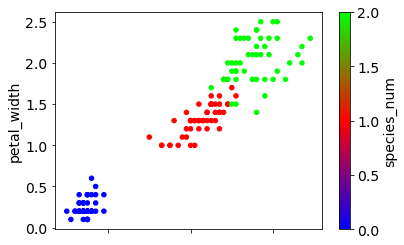

In [34]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

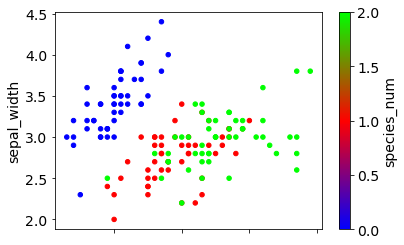

In [35]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [36]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = iris[feature_cols]

### Create your target vector "y"
This will be the species type.

In [37]:
y = iris.species_num

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

### Import KNN From `scikit-learn` and Instantiate a Model With One Neighbor

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [41]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9210526315789473


### Create a Model With Five Neighbors. Did it Improve?

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9210526315789473


In [46]:
# The accuracy of the model did not improve

0.9210526315789473


### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [63]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

scores

[[1, 0.98],
 [2, 0.9666666666666667],
 [3, 0.9666666666666667],
 [4, 0.9733333333333334],
 [5, 0.9733333333333334],
 [6, 0.98],
 [7, 0.9733333333333334],
 [8, 0.9733333333333334],
 [9, 0.98],
 [10, 0.9866666666666667],
 [11, 0.98],
 [12, 0.9866666666666667],
 [13, 0.98],
 [14, 0.98],
 [15, 0.9733333333333334],
 [16, 0.9733333333333334],
 [17, 0.9666666666666667],
 [18, 0.9733333333333334],
 [19, 0.9666666666666667],
 [20, 0.9666666666666667],
 [21, 0.9666666666666667],
 [22, 0.98],
 [23, 0.9666666666666667],
 [24, 0.98],
 [25, 0.98],
 [26, 0.9666666666666667],
 [27, 0.9733333333333334],
 [28, 0.9666666666666667],
 [29, 0.9666666666666667],
 [30, 0.96],
 [31, 0.9533333333333334],
 [32, 0.96],
 [33, 0.96],
 [34, 0.96],
 [35, 0.96],
 [36, 0.9533333333333334],
 [37, 0.9466666666666667],
 [38, 0.9466666666666667],
 [39, 0.9466666666666667],
 [40, 0.9466666666666667],
 [41, 0.9466666666666667],
 [42, 0.9533333333333334],
 [43, 0.9466666666666667],
 [44, 0.9533333333333334],
 [45, 0.946666666

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [ ]:
# Unable to find this command on the site but I'd guess it would return probability estimates for the for new predeicted values of X?

#### [Home](#home)

<a id="enrichment"></a>
# <font style='color: green'>3) Optional: Enrichment</font>
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [59]:
# First, format our data in a DataFrame

df = pd.read_csv('data/iowa_houses.csv')
df.head()

,Neighborhood,LotArea,MSZoning,HouseStyle,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,CollgCr,8450,RL,2Story,65.0,7,5,2003,2003,856,...,1,8,0,2003.0,2,548,0,61,0,208500
1,Veenker,9600,RL,1Story,80.0,6,8,1976,1976,1262,...,1,6,1,1976.0,2,460,298,0,0,181500
2,CollgCr,11250,RL,2Story,68.0,7,5,2001,2002,920,...,1,6,1,2001.0,2,608,0,42,0,223500
3,Crawfor,9550,RL,2Story,60.0,7,5,1915,1970,756,...,1,7,1,1998.0,3,642,0,35,272,140000
4,NoRidge,14260,RL,2Story,84.0,8,5,2000,2000,1145,...,1,9,1,2000.0,3,836,192,84,0,250000


In [71]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "SalePrice ~ GrLivArea + OverallQual + LotArea - 1", # - 1 = remove intercept
    "case2": "SalePrice ~ GrLivArea + LotFrontage",
    "case3": "SalePrice ~ LotFrontage + OverallQual"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              7785.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):                        0.00
Time:                        19:52:17   Log-Likelihood:                         -17805.
No. Observations:                1460   AIC:                                  3.562e+04
Df Residuals:                    1457   BIC:                                  3.563e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GrLivArea      48.0679      3.060     15.707      0.000      42.065      54.071
OverallQual  1.749e+04    758.858     23.051      0.000     1.6e+04     1.9e+04
LotArea         0.6270      0.130      4.834      0.000       0.373       0.881
==============================================================================
Omnibus:                      687.770   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8955.355
Skew:                           1.851   Prob(JB):                         0.00
Kurtosis:                      14.555   Cond. No.                     8.80e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

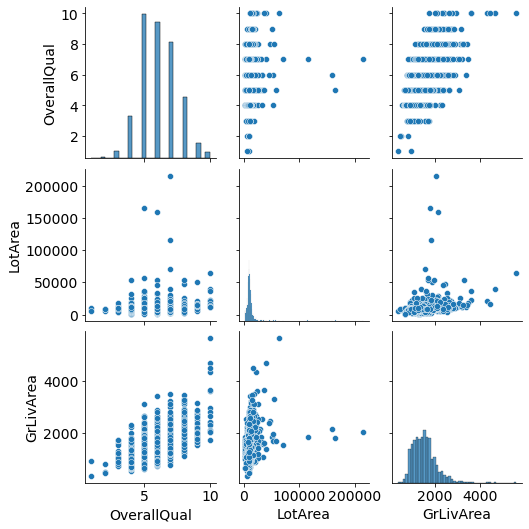

In [72]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [73]:
# Check out Pearson scores


### Bonus Challenge #3 /DEMO: Up for an additional challenge? Try again, this time using the `patsy` library

In [ ]:
import patsy

# Add response to the core DataFrame
df['SalePrice'] = y

In [70]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("SalePrice ~ GrLivArea + OverallQual + LotArea", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


NameError: name 'patsy' is not defined

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))